# Least Squares solution for a simple 2d regression problem

In this exercise, you will see how we can implement the least squares and apply it on synthetic data. The benefit is that we will see how the different coefficients used to create the data will surface as the weights of the least squares. In addition we will see how the noise will affect the exactness of the final solution that the least squares can produce.


**Learning Outcomes**

1. Implement a least squares solution using numpy only
2. Apply the implemented solution on a synthetic data and examine the resultant weights


In [3]:
import numpy as np
from numpy.linalg import inv  # NumPy Linear algebra library
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
# generate the data
def get_t( X, w_):
    w_ = np.array(w_)
    return  w_.dot(X)
    
def getData(w_, noise=0, n = 1000 ):
    x1 = np.linspace(-10, 10, num = n)           # sampling uniformly from the x axis
    x2 = np.random.normal(x1,5)                  # same but some noise to avoid matrix X^-1 singularity
    X  = np.array([np.ones(len(x1)), x1, x2])    # design matrix here it is a transpose of what we have studied because it makes implementaiton slightly less cluttered
    t  = get_t(X, w_)                            # get the target value
    t  = np.random.normal(t,noise)               # add noise to the target to see the effect on the MSE
    return X,t



We will solve for both cases (with and without basis)

## Generate the data first

In [5]:
w_    = [10, 2, 5]  # original linear model weights to generate the data from and to compare later with w
noise = 5
X,t   = getData(w_, noise=noise, n=9) # try with and without noise and with and without basis


In [4]:
#X1,t1 = X,t  #store
#X,t = X1,t1  #retrieve

## Least Squares Solution

In [5]:
def getLS(X,t):                       # Least Squares Solution!
    Xt = X.dot(t)
    XX = inv(X.dot(X.T))
        
    XX = np.round(XX,4)
    Xt = np.round(Xt,2)
    
    w  = XX.dot(Xt)
    w  = np.round(w,2)
    
    #print(XX*100)
    #print(Xt)
    #print(w)
    
    return w

## Now apply the Least Squares on the Generated Dataset

Now let us try it ......................!

In [6]:
def applyLST(X,t):    
    w   = getLS(X,t)                            # solve using least squares
    y   = get_t(X, w)                           # predict using the solution
   
    RMSE = np.sqrt(((t - y)**2).sum()/len(t))   # get the Sqrt(Mean Sum of Squared Error)
    return y, w, RMSE

y, w, RMSE = applyLST(X,t)


Now compare between the fitted model weights and the original weights used to create the dataset (remember we added noise so there is no prefect solution)

In [7]:
print(w)
print(w_)
print('RMSE',np.round(RMSE,2))
print(noise)                                # note how close RMSE is to the noise (when data is enough and for reasonable noise values < 100)
                                            # there is a reason for this, see the last lesson in the unit

[11.63  2.1   4.83]
[10, 2, 5]
RMSE 5.01
5


## Visualise 
Both attributes x1 and x2 in 2d, we may want to create a better visualisation by plotting in 3d (x1, x2, y)

Below we can realise that although Least squares is an exact solution (for the given data), the two lines may differ due to the added noise and not due to approximation.

In [7]:
X[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

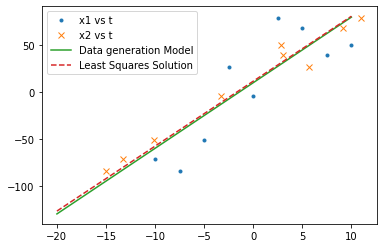

In [8]:
plt.plot(X[1],t,'.', label='x1 vs t')
plt.plot(X[2],t,'x', label='x2 vs t')
x1 = np.linspace(-20, 10, num = 9)
X1 = np.array([np.ones(len(x1)), x1, x1])
plt.plot(x1, get_t( X1, w_),'-' , label='Data generation Model')
plt.plot(x1, get_t( X1, w ),'--', label='Least Squares Solution')
plt.legend()


Create a data frame and store the dataset in a csv file

In [9]:
data = np.vstack((X,t,y)).T
df = pd.DataFrame(np.round(data,2), columns=['x0','x1','x2', 't', 'y'])
df.to_csv('simpleData.csv')
print(df)# [50:55])

    x0    x1     x2      t      y
0  1.0 -10.0 -13.24 -71.85 -73.30
1  1.0  -7.5 -15.03 -83.74 -76.73
2  1.0  -5.0 -10.13 -51.29 -47.77
3  1.0  -2.5   5.72  26.49  34.00
4  1.0   0.0  -3.27  -4.63  -4.16
5  1.0   2.5  11.00  79.03  70.03
6  1.0   5.0   9.18  68.27  66.46
7  1.0   7.5   3.04  39.72  42.04
8  1.0  10.0   2.78  50.09  46.08
